In [60]:
import pandas as pd

# Assuming the shipment data is stored in a CSV file named 'shipment_data.csv'
shipment_data = pd.read_csv('shipment_data.csv')

# Display the first few rows of the data to understand its structure
print(shipment_data.head())

                          name   price  weight  length  width  height  \
0                   Camera Bag   37.66    1.10    0.40   0.39    0.26   
1  Portable Bluetooth Keyboard  144.65    0.39    0.11   0.06    0.03   
2          Large Flat Rate Box   38.57    0.97    0.79   0.55    0.35   
3                Ceramic Tiles   10.34    6.22    0.36   0.37    0.02   
4                  Garden Hose   21.63    1.18   17.77   0.27    0.13   

  shipment date destination  
0    19-03-2023      Nashik  
1    21-03-2023      Jaipur  
2    25-03-2023   Ahmedabad  
3    15-03-2023       Surat  
4    25-03-2023   Ahmedabad  


In [3]:
# Remove duplicates, if any
shipment_data = shipment_data.drop_duplicates()

# Remove rows with missing values, if any
shipment_data = shipment_data.dropna()

# Check for outliers and decide how to handle them based on the specific context of the problem
# For example, you may choose to remove outliers based on certain thresholds for dimensions and weight

# Standardize the format of the data, if necessary (e.g., converting units to a consistent format)

# Display information about the cleaned data
print("Cleaned Shipment Data:")
print(shipment_data.info())


Cleaned Shipment Data:
<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           198 non-null    object 
 1   price          198 non-null    float64
 2   weight         198 non-null    float64
 3   length         198 non-null    float64
 4   width          198 non-null    float64
 5   height         198 non-null    float64
 6   shipment date  198 non-null    object 
 7   destination    198 non-null    object 
dtypes: float64(5), object(3)
memory usage: 13.9+ KB
None


In [4]:
# Assuming the columns containing dimensions, weight, and destination are named 'length', 'width', 'height', 'weight', and 'destination' respectively

# Extract dimensions (length, width, height)
dimensions = shipment_data[['length', 'width', 'height']]

# Extract weight
weight = shipment_data['weight']

# Extract destination
destination = shipment_data['destination']

# Display the extracted features
print("Extracted Dimensions:")
print(dimensions.head())

print("\nExtracted Weight:")
print(weight.head())

print("\nExtracted Destination:")
print(destination.head())

Extracted Dimensions:
   length  width  height
0    0.40   0.39    0.26
1    0.11   0.06    0.03
2    0.79   0.55    0.35
3    0.36   0.37    0.02
4   17.77   0.27    0.13

Extracted Weight:
0    1.10
1    0.39
2    0.97
3    6.22
4    1.18
Name: weight, dtype: float64

Extracted Destination:
0       Nashik
1       Jaipur
2    Ahmedabad
3        Surat
4    Ahmedabad
Name: destination, dtype: object


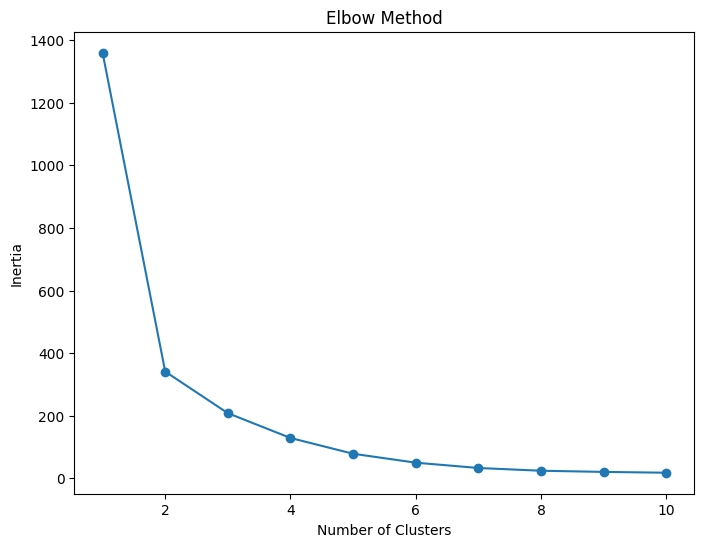

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming we have already standardized the features (dimensions and weight)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init to suppress warning
    kmeans.fit(dimensions)  # Assuming we're clustering based on dimensions
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
# Perform K-means clustering with the optimal number of clusters
optimal_k = 3  # Assuming 3 clusters based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(dimensions)  # Assuming we're clustering based on dimensions.

# Add cluster labels to the original data
shipment_data['cluster_label'] = cluster_labels

# Display the cluster labels assigned to each shipment
print("Cluster Labels:")
print(shipment_data[['length', 'width', 'height', 'weight', 'destination', 'cluster_label']].head())

Cluster Labels:
   length  width  height  weight destination  cluster_label
0    0.40   0.39    0.26    1.10      Nashik              0
1    0.11   0.06    0.03    0.39      Jaipur              0
2    0.79   0.55    0.35    0.97   Ahmedabad              0
3    0.36   0.37    0.02    6.22       Surat              0
4   17.77   0.27    0.13    1.18   Ahmedabad              1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Iterate through each cluster
for cluster_id in range(optimal_k):
    cluster_data = shipment_data[shipment_data['cluster_label'] == cluster_id]

    # Analyze shipments within the cluster
    # For example, you can look for shipments with similar destinations or compatible dimensions and weights

    # Here, we'll just print the shipments in each cluster for demonstration
    print(f"\nCluster {cluster_id}:")
    print(cluster_data[['length', 'width', 'height', 'weight', 'destination']])


Cluster 0:
     length  width  height   weight destination
0      0.40   0.39    0.26     1.10      Nashik
1      0.11   0.06    0.03     0.39      Jaipur
2      0.79   0.55    0.35     0.97   Ahmedabad
3      0.36   0.37    0.02     6.22       Surat
5      0.49   0.35    0.15     7.60       Surat
..      ...    ...     ...      ...         ...
195    1.36   1.16    1.48  3516.22      Jaipur
196    0.34   0.55    0.26     2.89      Jaipur
197    0.19   0.03    0.02     0.22       Delhi
198    0.45   0.24    0.18     1.92   Ahmedabad
199    1.26   0.82    1.20   992.18       Surat

[195 rows x 5 columns]

Cluster 1:
    length  width  height   weight destination
4    17.77   0.27    0.13     1.18   Ahmedabad
37   10.95   3.23    5.40  2942.29      Jaipur

Cluster 2:
     length  width  height   weight destination
127   28.34   3.38    3.91  2463.18      Jaipur


In [8]:
# Iterate through each cluster
for cluster_id in range(optimal_k):
    cluster_data = shipment_data[shipment_data['cluster_label'] == cluster_id]

    # Initialize a list to store potential consolidation opportunities within the cluster
    consolidation_opportunities = []

    # Iterate through each shipment in the cluster
    for index, shipment in cluster_data.iterrows():
        # Compare the destination of the current shipment with other shipments in the cluster
        similar_destinations = cluster_data[cluster_data['destination'] == shipment['destination']]

        # Check for shipments with compatible dimensions and weights
        compatible_shipments = similar_destinations[
            (similar_destinations['length'] <= shipment['length']) &
            (similar_destinations['width'] <= shipment['width']) &
            (similar_destinations['height'] <= shipment['height']) &
            (similar_destinations['weight'] <= shipment['weight'])
        ]

        # Exclude the current shipment itself from the list of compatible shipments
        compatible_shipments = compatible_shipments[compatible_shipments.index != index]

        # If there are compatible shipments, add them to the list of consolidation opportunities
        if not compatible_shipments.empty:
            consolidation_opportunities.append((shipment, compatible_shipments))

    # Print consolidation opportunities for the cluster
    print(f"\nConsolidation Opportunities for Cluster {cluster_id}:")
    for shipment, compatible_shipments in consolidation_opportunities:
        print(f"Shipment {shipment.name} can be consolidated with:")
        for idx, comp_shipment in compatible_shipments.iterrows():
            print(f"- Shipment {comp_shipment.name}")



Consolidation Opportunities for Cluster 0:
Shipment 0 can be consolidated with:
- Shipment 33
- Shipment 46
- Shipment 47
- Shipment 104
- Shipment 176
Shipment 2 can be consolidated with:
- Shipment 9
- Shipment 13
- Shipment 64
- Shipment 109
- Shipment 116
- Shipment 146
- Shipment 164
- Shipment 167
- Shipment 177
Shipment 3 can be consolidated with:
- Shipment 178
Shipment 5 can be consolidated with:
- Shipment 11
- Shipment 12
- Shipment 38
- Shipment 59
- Shipment 79
- Shipment 106
- Shipment 134
- Shipment 141
- Shipment 163
- Shipment 173
- Shipment 178
Shipment 6 can be consolidated with:
- Shipment 0
- Shipment 29
- Shipment 33
- Shipment 46
- Shipment 47
- Shipment 71
- Shipment 104
- Shipment 131
- Shipment 176
Shipment 7 can be consolidated with:
- Shipment 2
- Shipment 9
- Shipment 13
- Shipment 34
- Shipment 39
- Shipment 41
- Shipment 51
- Shipment 64
- Shipment 77
- Shipment 83
- Shipment 93
- Shipment 109
- Shipment 116
- Shipment 146
- Shipment 156
- Shipment 164
-

In [9]:
# Iterate through each cluster
for cluster_id in range(optimal_k):
    cluster_data = shipment_data[shipment_data['cluster_label'] == cluster_id]

    # Initialize a list to store potential consolidation opportunities within the cluster
    consolidation_opportunities = []

    # Iterate through each shipment in the cluster
    for index, shipment in cluster_data.iterrows():
        # Compare the destination of the current shipment with other shipments in the cluster
        similar_destinations = cluster_data[cluster_data['destination'] == shipment['destination']]

        # Check for shipments with compatible dimensions and weights
        compatible_shipments = similar_destinations[
            (similar_destinations['length'] <= shipment['length']) &
            (similar_destinations['width'] <= shipment['width']) &
            (similar_destinations['height'] <= shipment['height']) &
            (similar_destinations['weight'] <= shipment['weight'])
        ]

        # Exclude the current shipment itself from the list of compatible shipments
        compatible_shipments = compatible_shipments[compatible_shipments.index != index]

        # If there are compatible shipments, add them to the list of consolidation opportunities
        if not compatible_shipments.empty:
            consolidation_opportunities.append((shipment, compatible_shipments))

    # Print consolidation opportunities for the cluster
    print(f"\nConsolidation Opportunities for Cluster {cluster_id}:")
    for shipment, compatible_shipments in consolidation_opportunities:
        print(f"Shipment {shipment.name} can be consolidated with:")
        for idx, comp_shipment in compatible_shipments.iterrows():
            print(f"- Shipment {comp_shipment.name}")



Consolidation Opportunities for Cluster 0:
Shipment 0 can be consolidated with:
- Shipment 33
- Shipment 46
- Shipment 47
- Shipment 104
- Shipment 176
Shipment 2 can be consolidated with:
- Shipment 9
- Shipment 13
- Shipment 64
- Shipment 109
- Shipment 116
- Shipment 146
- Shipment 164
- Shipment 167
- Shipment 177
Shipment 3 can be consolidated with:
- Shipment 178
Shipment 5 can be consolidated with:
- Shipment 11
- Shipment 12
- Shipment 38
- Shipment 59
- Shipment 79
- Shipment 106
- Shipment 134
- Shipment 141
- Shipment 163
- Shipment 173
- Shipment 178
Shipment 6 can be consolidated with:
- Shipment 0
- Shipment 29
- Shipment 33
- Shipment 46
- Shipment 47
- Shipment 71
- Shipment 104
- Shipment 131
- Shipment 176
Shipment 7 can be consolidated with:
- Shipment 2
- Shipment 9
- Shipment 13
- Shipment 34
- Shipment 39
- Shipment 41
- Shipment 51
- Shipment 64
- Shipment 77
- Shipment 83
- Shipment 93
- Shipment 109
- Shipment 116
- Shipment 146
- Shipment 156
- Shipment 164
-

In [11]:
# Initialize a dictionary to store consolidated shipments for each container
consolidated_shipments = {}

# Iterate through each consolidation opportunity
for cluster_id in range(optimal_k):
    cluster_data = shipment_data[shipment_data['cluster_label'] == cluster_id]
    consolidation_opportunities = []

    for index, shipment in cluster_data.iterrows():
        similar_destinations = cluster_data[cluster_data['destination'] == shipment['destination']]
        compatible_shipments = similar_destinations[
            (similar_destinations['length'] <= shipment['length']) &
            (similar_destinations['width'] <= shipment['width']) &
            (similar_destinations['height'] <= shipment['height']) &
            (similar_destinations['weight'] <= shipment['weight'])
        ]
        compatible_shipments = compatible_shipments[compatible_shipments.index != index]

        if not compatible_shipments.empty:
            consolidation_opportunities.append((shipment, compatible_shipments))

    # Consolidate shipments within each cluster
    for shipment, compatible_shipments in consolidation_opportunities:
        consolidated_shipments.setdefault(cluster_id, []).append((shipment, compatible_shipments))


In [45]:
# Define a function to optimize the load configuration for a single container
def optimize_load_configuration(container_capacity, container_dimensions, shipments):
    # Initialize variables
    total_weight = 0
    total_volume = 0
    load_configuration = []

    # Iterate through shipments and add them to the container if constraints are satisfied
    for shipment, compatible_shipments in shipments:
        # Check weight constraint
        if total_weight + shipment['weight'] <= container_capacity:
            # Check dimensional constraints
            if (total_volume + shipment['length'] * shipment['width'] * shipment['height']) <= (
                    container_dimensions['length'] * container_dimensions['width'] * container_dimensions['height']):
                # Add shipment to the container
                load_configuration.append(shipment)
                total_weight += shipment['weight']
                total_volume += shipment['length'] * shipment['width'] * shipment['height']

    return load_configuration

# Define container capacity and dimensions
container_capacity = 20000 # Example weight capacity in kilograms
container_dimensions = {'length': 30, 'width': 30, 'height': 30}  # Example dimensions in meters

# Iterate through each container and optimize the load configuration
optimized_load_configurations = {}
for cluster_id, shipments in consolidated_shipments.items():
    optimized_load_configurations[cluster_id] = optimize_load_configuration(container_capacity, container_dimensions, shipments)


In [13]:
def optimize_load_configuration(container_capacity, container_dimensions, shipments):
    total_weight = 0
    total_volume = 0
    load_configuration = []

    for shipment, compatible_shipments in shipments:
        # Check weight constraint
        if total_weight + shipment['weight'] <= container_capacity:
            # Check dimensional constraints
            if (total_volume + shipment['length'] * shipment['width'] * shipment['height']) <= (
                    container_dimensions['length'] * container_dimensions['width'] * container_dimensions['height']):
                # Add shipment to the container
                load_configuration.append(shipment)
                total_weight += shipment['weight']
                total_volume += shipment['length'] * shipment['width'] * shipment['height']

    return load_configuration


In [14]:
def identify_shipments_with_special_handling(shipments):
    # Initialize an empty list to store shipments with special handling requirements
    special_handling_shipments = []

    # Iterate through each shipment
    for shipment in shipments:
        # Check if the shipment meets the criteria for special handling requirements
        if shipment['special_handling_required']:
            # If the shipment meets the criteria, flag it as requiring special handling
            special_handling_shipments.append(shipment)

    return special_handling_shipments

# Example function to classify shipments and determine if special handling is required
def classify_shipments(shipments):
    classified_shipments = []
    for shipment in shipments:
        # Example: Determine if the shipment contains hazardous materials
        if shipment['material_type'] == 'Hazardous':
            shipment['special_handling_required'] = True
        else:
            shipment['special_handling_required'] = False
        classified_shipments.append(shipment)
    return classified_shipments

# Example shipments data
shipments = [
    {'id': 1, 'material_type': 'Normal'},
    {'id': 2, 'material_type': 'Hazardous'},
    {'id': 3, 'material_type': 'Normal'},
    # Add more shipments as needed
]

# Classify shipments and identify shipments with special handling requirements
classified_shipments = classify_shipments(shipments)
special_handling_shipments = identify_shipments_with_special_handling(classified_shipments)

print("Shipments with Special Handling Requirements:")
for shipment in special_handling_shipments:
    print(f"- Shipment {shipment['id']} requires special handling")


Shipments with Special Handling Requirements:
- Shipment 2 requires special handling


In [23]:
def identify_shipments_with_special_handling(shipments):
    # Initialize an empty list to store shipments with special handling requirements
    special_handling_shipments = []

    # Iterate through each shipment
    for shipment in shipments:
        # Check if the shipment meets the criteria for special handling requirements
        if shipment['special_handling_required']:
            # If the shipment meets the criteria, flag it as requiring special handling
            special_handling_shipments.append(shipment)

    return special_handling_shipments

# Example function to classify shipments and determine if special handling is required
def classify_shipments(shipments):
    classified_shipments = []
    for shipment in shipments:
        # Example: Determine if the shipment contains hazardous materials
        if shipment['material_type'] == 'Hazardous':
            shipment['special_handling_required'] = True
        else:
            shipment['special_handling_required'] = False
        classified_shipments.append(shipment)
    return classified_shipments

# Example shipments data
shipments = [
    {'id': 1, 'material_type': 'Normal'},
    {'id': 2, 'material_type': 'Hazardous'},
    {'id': 3, 'material_type': 'Normal'},
    # Add more shipments as needed
]

# Classify shipments and identify shipments with special handling requirements
classified_shipments = classify_shipments(shipments)
special_handling_shipments = identify_shipments_with_special_handling(classified_shipments)

print("Shipments with Special Handling Requirements:")
for shipment in special_handling_shipments:
    print(f"- Shipment {shipment['id']} requires special handling")


Shipments with Special Handling Requirements:
- Shipment 2 requires special handling


In [48]:
def optimize_load_configuration(container_capacity, container_dimensions, shipments):
    remaining_capacity = container_capacity
    remaining_space = {
        'length': container_dimensions['length'],
        'width': container_dimensions['width'],
        'height': container_dimensions['height']
    }
    optimized_load = []

    for shipment in shipments:
        if shipment['weight'] <= remaining_capacity:
            if (shipment['length'] <= remaining_space['length'] and
                shipment['width'] <= remaining_space['width'] and
                shipment['height'] <= remaining_space['height']):

                optimized_load.append(shipment)
                remaining_capacity -= shipment['weight']
                remaining_space['length'] -= shipment['length']
                remaining_space['width'] -= shipment['width']
                remaining_space['height'] -= shipment['height']

    return optimized_load

# Example test scenario
container_capacity = 20000  # Example weight capacity in kilograms
container_dimensions = {'length': 30, 'width': 10, 'height': 10}  # Example dimensions in meters
shipments = [
    {'id': 1, 'length': 2, 'width': 2, 'height': 2, 'weight': 100, 'special_handling_required': False},  # Normal shipment
    {'id': 2, 'length': 3, 'width': 3, 'height': 3, 'weight': 200, 'special_handling_required': True},   # Shipment with special handling
    {'id': 3, 'length': 4, 'width': 4, 'height': 4, 'weight': 300, 'special_handling_required': False},  # Normal shipment
    {'id': 5, 'length': 2, 'width': 3, 'height': 2, 'weight': 250, 'special_handling_required': False},
    {'id': 6, 'length': 2, 'width': 2, 'height': 3, 'weight': 180, 'special_handling_required': False},
    {'id': 7, 'length': 3, 'width': 2, 'height': 2, 'weight': 280, 'special_handling_required': False},
    {'id': 8, 'length': 3, 'width': 3, 'height': 2, 'weight': 320, 'special_handling_required': False},
    {'id': 9, 'length': 2, 'width': 3, 'height': 3, 'weight': 290, 'special_handling_required': True},
    {'id': 10, 'length': 3, 'width': 2, 'height': 3, 'weight': 350, 'special_handling_required': False},
    {'id': 11, 'length': 2, 'width': 4, 'height': 2, 'weight': 220, 'special_handling_required': False},
    {'id': 12, 'length': 3, 'width': 4, 'height': 3, 'weight': 400, 'special_handling_required': False},
    {'id': 13, 'length': 4, 'width': 3, 'height': 4, 'weight': 480, 'special_handling_required': False},
    {'id': 14, 'length': 5, 'width': 3, 'height': 3, 'weight': 430, 'special_handling_required': True},
    {'id': 15, 'length': 2, 'width': 3, 'height': 3, 'weight': 270, 'special_handling_required': False},
    {'id': 16, 'length': 4, 'width': 4, 'height': 2, 'weight': 420, 'special_handling_required': False},
    {'id': 17, 'length': 3, 'width': 2, 'height': 2, 'weight': 300, 'special_handling_required': False},
]

# Execute optimization model
optimized_load_configuration = optimize_load_configuration(container_capacity, container_dimensions, shipments)

# Display results
print("Optimized Load Configuration:")
for shipment in optimized_load_configuration:
    print(f"- Shipment {shipment['id']}")
    if shipment['special_handling_required']:
        print("  Special Handling Required")
    print(f"  Dimensions: {shipment['length']} x {shipment['width']} x {shipment['height']}")
    print(f"  Weight: {shipment['weight']} kg")


Optimized Load Configuration:
- Shipment 1
  Dimensions: 2 x 2 x 2
  Weight: 100 kg
- Shipment 2
  Special Handling Required
  Dimensions: 3 x 3 x 3
  Weight: 200 kg
- Shipment 3
  Dimensions: 4 x 4 x 4
  Weight: 300 kg


In [50]:
# Example test scenario
container_capacity = 20000  # Example weight capacity in kilograms
container_dimensions = {'length': 30, 'width': 10, 'height': 10}  # Example dimensions in meters
shipments = [

    {'id': 1, 'length': 2, 'width': 2, 'height': 2, 'weight': 100, 'special_handling_required': False},  # Normal shipment
    {'id': 2, 'length': 3, 'width': 3, 'height': 3, 'weight': 200, 'special_handling_required': True},   # Shipment with special handling
    {'id': 3, 'length': 4, 'width': 4, 'height': 4, 'weight': 300, 'special_handling_required': False},  # Normal shipment
    {'id': 5, 'length': 2, 'width': 3, 'height': 2, 'weight': 250, 'special_handling_required': False},
    {'id': 6, 'length': 2, 'width': 2, 'height': 3, 'weight': 180, 'special_handling_required': False},
    {'id': 7, 'length': 3, 'width': 2, 'height': 2, 'weight': 280, 'special_handling_required': False},
    {'id': 8, 'length': 3, 'width': 3, 'height': 2, 'weight': 320, 'special_handling_required': False},
    {'id': 9, 'length': 2, 'width': 3, 'height': 3, 'weight': 290, 'special_handling_required': True},
    {'id': 10, 'length': 3, 'width': 2, 'height': 3, 'weight': 350, 'special_handling_required': False},
    {'id': 11, 'length': 2, 'width': 4, 'height': 2, 'weight': 220, 'special_handling_required': False},
    {'id': 12, 'length': 3, 'width': 4, 'height': 3, 'weight': 400, 'special_handling_required': False},
    {'id': 13, 'length': 4, 'width': 3, 'height': 4, 'weight': 480, 'special_handling_required': False},
    {'id': 14, 'length': 5, 'width': 3, 'height': 3, 'weight': 430, 'special_handling_required': True},
    {'id': 15, 'length': 2, 'width': 3, 'height': 3, 'weight': 270, 'special_handling_required': False},
    {'id': 16, 'length': 4, 'width': 4, 'height': 2, 'weight': 420, 'special_handling_required': False},
    {'id': 17, 'length': 3, 'width': 2, 'height': 2, 'weight': 300, 'special_handling_required': False},

]

# Execute optimization model
optimized_load_configuration = optimize_load_configuration(container_capacity, container_dimensions, shipments)

# Display results
print("Optimized Load Configuration:")
for shipment in optimized_load_configuration:
    print(f"- Shipment {shipment['id']}")
    if shipment['special_handling_required']:
        print("  Special Handling Required")
    print(f"  Dimensions: {shipment['length']} x {shipment['width']} x {shipment['height']}")
    print(f"  Weight: {shipment['weight']} kg")


Optimized Load Configuration:
- Shipment 1
  Dimensions: 2 x 2 x 2
  Weight: 100 kg
- Shipment 2
  Special Handling Required
  Dimensions: 3 x 3 x 3
  Weight: 200 kg


In [54]:
# Example test scenario
container_capacity = 20000  # Example weight capacity in kilograms
container_dimensions = {'length': 30, 'width': 10, 'height': 10}  # Example dimensions in meters
shipments = [
    {'id': 1, 'length': 2, 'width': 2, 'height': 2, 'weight': 100, 'special_handling_required': False},  # Normal shipment
    {'id': 2, 'length': 3, 'width': 3, 'height': 3, 'weight': 200, 'special_handling_required': True},   # Shipment with special handling
    {'id': 3, 'length': 4, 'width': 4, 'height': 4, 'weight': 300, 'special_handling_required': False},  # Normal shipment
    {'id': 5, 'length': 2, 'width': 3, 'height': 2, 'weight': 250, 'special_handling_required': False},
    {'id': 6, 'length': 2, 'width': 2, 'height': 3, 'weight': 180, 'special_handling_required': False},
    {'id': 7, 'length': 3, 'width': 2, 'height': 2, 'weight': 280, 'special_handling_required': False},
    {'id': 8, 'length': 3, 'width': 3, 'height': 2, 'weight': 320, 'special_handling_required': False},
    {'id': 9, 'length': 2, 'width': 3, 'height': 3, 'weight': 290, 'special_handling_required': True},
    {'id': 10, 'length': 3, 'width': 2, 'height': 3, 'weight': 350, 'special_handling_required': False},
    {'id': 11, 'length': 2, 'width': 4, 'height': 2, 'weight': 220, 'special_handling_required': False},
    {'id': 12, 'length': 3, 'width': 4, 'height': 3, 'weight': 400, 'special_handling_required': False},
    {'id': 13, 'length': 4, 'width': 3, 'height': 4, 'weight': 480, 'special_handling_required': False},
    {'id': 14, 'length': 5, 'width': 3, 'height': 3, 'weight': 430, 'special_handling_required': True},
    {'id': 15, 'length': 2, 'width': 3, 'height': 3, 'weight': 270, 'special_handling_required': False},
    {'id': 16, 'length': 4, 'width': 4, 'height': 2, 'weight': 420, 'special_handling_required': False},
    {'id': 17, 'length': 3, 'width': 2, 'height': 2, 'weight': 300, 'special_handling_required': False},
]

# Execute optimization model
optimized_load_configuration = optimize_load_configuration(container_capacity, container_dimensions, shipments)

# Display results
print("Optimized Load Configuration:")
for shipment in optimized_load_configuration:
    print(f"- Shipment {shipment['id']}")
    if shipment['special_handling_required']:
        print("  Special Handling Required")
    print(f"  Dimensions: {shipment['length']} x {shipment['width']} x {shipment['height']}")
    print(f"  Weight: {shipment['weight']} kg")


Optimized Load Configuration:
- Shipment 1
  Dimensions: 2 x 2 x 2
  Weight: 100 kg
- Shipment 2
  Special Handling Required
  Dimensions: 3 x 3 x 3
  Weight: 200 kg
- Shipment 3
  Dimensions: 4 x 4 x 4
  Weight: 300 kg


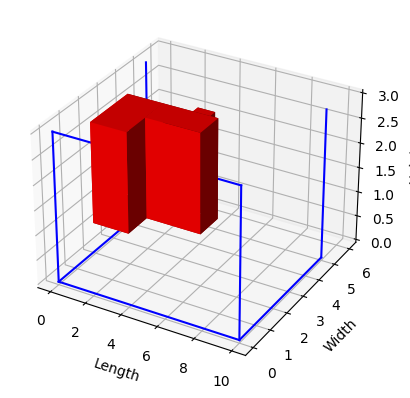

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d(container_dimensions, shipments):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot container
    container_x = [0, container_dimensions['length']]
    container_y = [0, container_dimensions['width']]
    container_z = [0, container_dimensions['height']]
    ax.plot(container_x, [0, 0], [0, 0], color='blue')  # Bottom
    ax.plot([0, 0], container_y, [0, 0], color='blue')
    ax.plot(container_x, [0, 0], [container_dimensions['height'], container_dimensions['height']], color='blue')  # Top
    ax.plot([container_dimensions['length'], container_dimensions['length']], container_y, [0, 0], color='blue')
    ax.plot([0, 0], [0, 0], container_z, color='blue')
    ax.plot([0, 0], [container_dimensions['width'], container_dimensions['width']], container_z, color='blue')
    ax.plot([container_dimensions['length'], container_dimensions['length']], [0, 0], container_z, color='blue')
    ax.plot([container_dimensions['length'], container_dimensions['length']], [container_dimensions['width'], container_dimensions['width']], container_z, color='blue')

    # Plot shipments
    for shipment in shipments:
        x = shipment.get('x', 0)  # Default to 0 if 'x' key is missing
        y = shipment.get('y', 0)  # Default to 0 if 'y' key is missing
        z = shipment.get('z', 0)  # Default to 0 if 'z' key is missing
        length = shipment.get('length', 1)  # Default to 1 if 'length' key is missing
        width = shipment.get('width', 1)  # Default to 1 if 'width' key is missing
        height = shipment.get('height', 1)  # Default to 1 if 'height' key is missing
        ax.bar3d(x, y, z, length, width, height, color='red')

    ax.set_xlabel('Length')
    ax.set_ylabel('Width')
    ax.set_zlabel('Height')
    plt.show()

# Sample container dimensions
container_dimensions = {'length': 10, 'width': 5, 'height': 3}

# Sample shipment configurations
optimized_load_configuration = [
    {'x': 1, 'y': 1, 'z': 1, 'length': 2, 'width': 2, 'height': 2},
    {'x': 3, 'y': 2, 'z': 1, 'length': 3, 'width': 1, 'height': 2},
    {'x': 2, 'y': 4, 'z': 1, 'length': 1, 'width': 2, 'height': 1}
]

# Call the function with container dimensions and shipments
visualize_3d(container_dimensions, optimized_load_configuration)
